# linear model that predicts student performance

### this project uses linear regresion model
##### where the equation for the model is y=ax+b; 
##### x=independent variable 
##### y=dependent variable
##### a=coefficient of x and lastly b=intercept

## importing packages

In [158]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle
from matplotlib import style

### spliting data for train and test

In [159]:
data=pd.read_csv("student-mat.csv",sep=";")
print(data.head())

data=data[["G1","G2","G3","studytime","failures","absences"]]
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         

In [160]:
predict="G3"

### preparing for training and testing

In [161]:
X=np.array(data.drop("G3",axis=1))
Y=np.array(data[predict])
print(Y)

[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12
 14 15 11 15 13 18 14 11  0  8 14 16 11 10 14 18 13 12 18  8 12 10  0 13
 11 11 13 11  0  9 10 11 13  9 11 15 15 11 16 10  9

In [162]:
 x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.1)

#### Use case  to get better accuracy

In [163]:
'''best=0
for u in range(30):
    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.1)
    linear=linear_model.LinearRegression()
    linear.fit(x_train,y_train)
    acc=linear.score(x_test,y_test)
    print(acc)
    if acc>best:
        best=acc
        with open("studentmodel.pickle","wb") as f:
            pickle.dump(linear,f)'''

'best=0\nfor u in range(30):\n    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.1)\n    linear=linear_model.LinearRegression()\n    linear.fit(x_train,y_train)\n    acc=linear.score(x_test,y_test)\n    print(acc)\n    if acc>best:\n        best=acc\n        with open("studentmodel.pickle","wb") as f:\n            pickle.dump(linear,f)'

### here I use pickle which saves my model

In [164]:
pickle_in=open("studentmodel.pickle","rb")
linear=pickle.load(pickle_in)

In [165]:
print("coefficient:\n",linear.coef_)
print("intercept:\n",linear.intercept_)

coefficient:
 [ 0.16225944  0.97467317 -0.20467135 -0.35152514  0.03765517]
intercept:
 -1.51814794532455


In [166]:
predictions=linear.predict(x_test)
print(predictions)

[ 9.1809881  12.72114691 14.75744232 12.92794351 17.23810413 14.26954746
  7.84691796 11.03063005  6.76288135 12.76568407  8.94341832 14.03197768
 12.76945098 12.24026076  7.17173706 10.74102739  7.70678134  8.84371394
  7.2432805   7.29273924  7.16797015 12.08263135 10.38371756  9.43019662
 11.68869428  8.73550516  3.772578   16.1600864   8.50229675 12.242873
 13.93551511  3.56790664 15.36406814 11.92999287  9.59245606 18.08341629
  9.44183536  4.59088388  8.60614415 -0.9385284 ]


In [167]:
for x in range(10):
    print(predictions[x],x_test[x],y_test[x])

9.180988099750595 [ 7 10  2  0  6] 10
12.721146906354656 [10 13  1  0  4] 14
14.757442323434606 [11 15  1  0  2] 15
12.927943508178803 [13 13  2  0  2] 13
17.23810412697711 [16 17  2  0  0] 17
14.26954746267742 [14 14  1  0  2] 14
7.846917962124213 [ 6  9  1  2 14] 8
11.030630054524995 [11 11  2  0 12] 11
6.762881354340628 [ 7  7  1  0 14] 5
12.765684073153306 [12 13  2  0  2] 13


In [168]:
style.use("mpl20")

Text(0, 0.5, 'final grade')

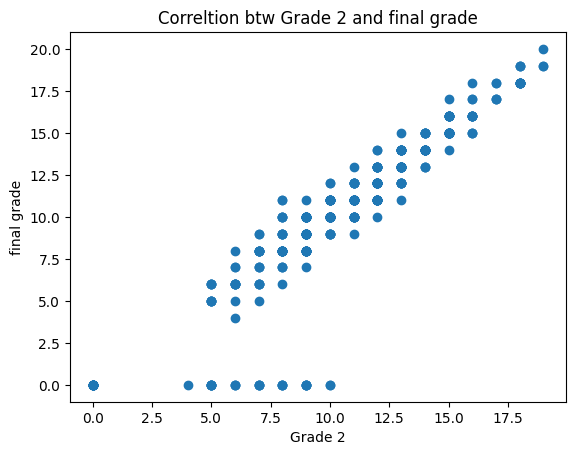

In [169]:
plt.scatter(data['G2'],data['G3'])
plt.title("Correltion btw Grade 2 and final grade")
plt.xlabel("Grade 2")
plt.ylabel("final grade")

Text(0, 0.5, 'final grade')

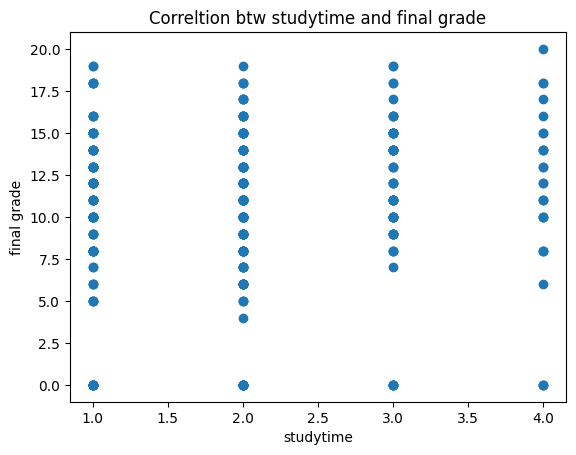

In [170]:
plt.scatter(data['studytime'],data['G3'])
plt.title("Correltion btw studytime and final grade")
plt.xlabel("studytime")
plt.ylabel("final grade")

Text(0, 0.5, 'final grade')

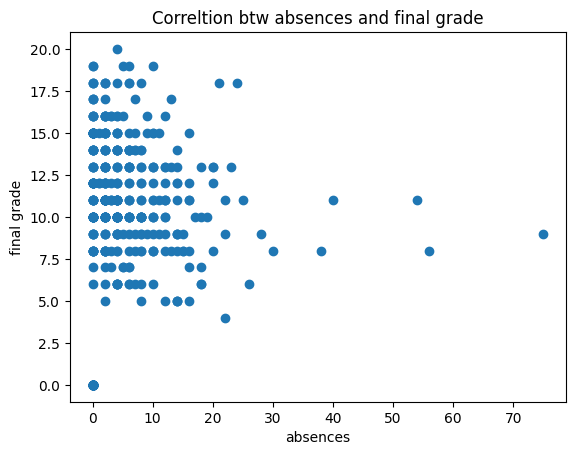

In [171]:
plt.scatter(data['absences'],data['G3'])
plt.title("Correltion btw absences and final grade")
plt.xlabel("absences")
plt.ylabel("final grade")